In [37]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Setup Complete!")


Setup Complete!


In [22]:
np.random.seed(42)

recipes_df = pd.DataFrame({
    'recipe_id': range(1, 101),
    'recipe_name': [f'Recipe {i}' for i in range(1, 101)],
    'prep_time': np.random.randint(15, 120, 100),
    'num_steps': np.random.randint(3, 20, 100),
    'num_ingredients': np.random.randint(5, 20, 100),
    'rating': np.random.uniform(3.0, 5.0, 100).round(2)
})

ratings_df = pd.DataFrame({
    'recipe_id': np.random.choice(range(1, 101), 300),
    'user_rating': np.random.choice([1, 2, 3, 4, 5], 300, p=[0.05, 0.1, 0.15, 0.3, 0.4])
})

print("Sample data created!")
print(f"Total recipes: {len(recipes_df)}")
print(f"Total ratings: {len(ratings_df)}")
print("\nRecipes preview:")
print(recipes_df.head())

Sample data created!
Total recipes: 100
Total ratings: 300

Recipes preview:
   recipe_id recipe_name  prep_time  num_steps  num_ingredients  rating
0          1    Recipe 1        117         18                7    3.01
1          2    Recipe 2         66         15               18    3.32
2          3    Recipe 3        107         17                6    4.10
3          4    Recipe 4         29         15                9    4.38
4          5    Recipe 5         86         11               16    4.30


In [23]:

recipes_df = recipes_df.drop_duplicates()
ratings_df = ratings_df.drop_duplicates()

print(f"Recipes after cleaning: {len(recipes_df)}")
print(f"Ratings after cleaning: {len(ratings_df)}")
print("✓ Data cleaned!")

Recipes after cleaning: 100
Ratings after cleaning: 198
✓ Data cleaned!


In [24]:
avg_ratings = ratings_df.groupby('recipe_id').agg({
    'user_rating': ['mean', 'count']
}).reset_index()

avg_ratings.columns = ['recipe_id', 'avg_rating', 'review_count']

df = recipes_df.merge(avg_ratings, on='recipe_id', how='left')
df['avg_rating'] = df['avg_rating'].fillna(df['avg_rating'].mean())
df['review_count'] = df['review_count'].fillna(0)

print("Data merged successfully!")
print(df.head())


Data merged successfully!
   recipe_id recipe_name  prep_time  num_steps  num_ingredients  rating  \
0          1    Recipe 1        117         18                7    3.01   
1          2    Recipe 2         66         15               18    3.32   
2          3    Recipe 3        107         17                6    4.10   
3          4    Recipe 4         29         15                9    4.38   
4          5    Recipe 5         86         11               16    4.30   

   avg_rating  review_count  
0         4.5           2.0  
1         4.0           2.0  
2         4.0           1.0  
3         5.0           1.0  
4         4.0           1.0  


In [25]:
print("=" * 60)
print("RECIPE ANALYSIS STATISTICS")
print("=" * 60)

print(f"\nTotal Recipes: {len(df)}")
print(f"Average Rating: {df['avg_rating'].mean():.2f} / 5.0")
print(f"Average Prep Time: {df['prep_time'].mean():.1f} minutes")
print(f"Average Steps: {df['num_steps'].mean():.1f}")
print(f"Average Ingredients: {df['num_ingredients'].mean():.1f}")
print(f"Total Reviews: {df['review_count'].sum():.0f}")

print(f"\nRating Range: {df['avg_rating'].min():.2f} - {df['avg_rating'].max():.2f}")
print(f"Time Range: {df['prep_time'].min()} - {df['prep_time'].max()} minutes")

RECIPE ANALYSIS STATISTICS

Total Recipes: 100
Average Rating: 3.89 / 5.0
Average Prep Time: 67.5 minutes
Average Steps: 10.5
Average Ingredients: 11.1
Total Reviews: 198

Rating Range: 1.00 - 5.00
Time Range: 16 - 118 minutes


In [26]:
print("\n" + "=" * 60)
print("TOP 10 HIGHEST RATED RECIPES")
print("=" * 60)

top_recipes = df.nlargest(10, 'avg_rating')[['recipe_name', 'avg_rating', 'review_count', 'prep_time']]
print(top_recipes.to_string(index=False))


TOP 10 HIGHEST RATED RECIPES
recipe_name  avg_rating  review_count  prep_time
   Recipe 4         5.0           1.0         29
  Recipe 15         5.0           1.0        118
  Recipe 26         5.0           1.0         74
  Recipe 40         5.0           1.0         29
  Recipe 41         5.0           1.0         76
  Recipe 48         5.0           1.0         17
  Recipe 60         5.0           1.0         23
  Recipe 70         5.0           1.0         61
  Recipe 73         5.0           1.0         95
  Recipe 77         5.0           1.0         18


In [27]:
df['time_category'] = pd.cut(
    df['prep_time'],
    bins=[0, 30, 60, 120],
    labels=['Quick (< 30 min)', 'Medium (30-60 min)', 'Long (> 60 min)']
)

print("\n" + "=" * 60)
print("RECIPES BY PREPARATION TIME")
print("=" * 60)

time_dist = df['time_category'].value_counts()
for category, count in time_dist.items():
    percentage = (count / len(df)) * 100
    print(f"{category}: {count} recipes ({percentage:.1f}%)")

print("\nAverage Rating by Time Category:")
time_rating = df.groupby('time_category')['avg_rating'].mean()
for category, rating in time_rating.items():
    print(f"{category}: {rating:.2f}")




RECIPES BY PREPARATION TIME
Long (> 60 min): 63 recipes (63.0%)
Medium (30-60 min): 19 recipes (19.0%)
Quick (< 30 min): 18 recipes (18.0%)

Average Rating by Time Category:
Quick (< 30 min): 3.92
Medium (30-60 min): 3.65
Long (> 60 min): 3.95


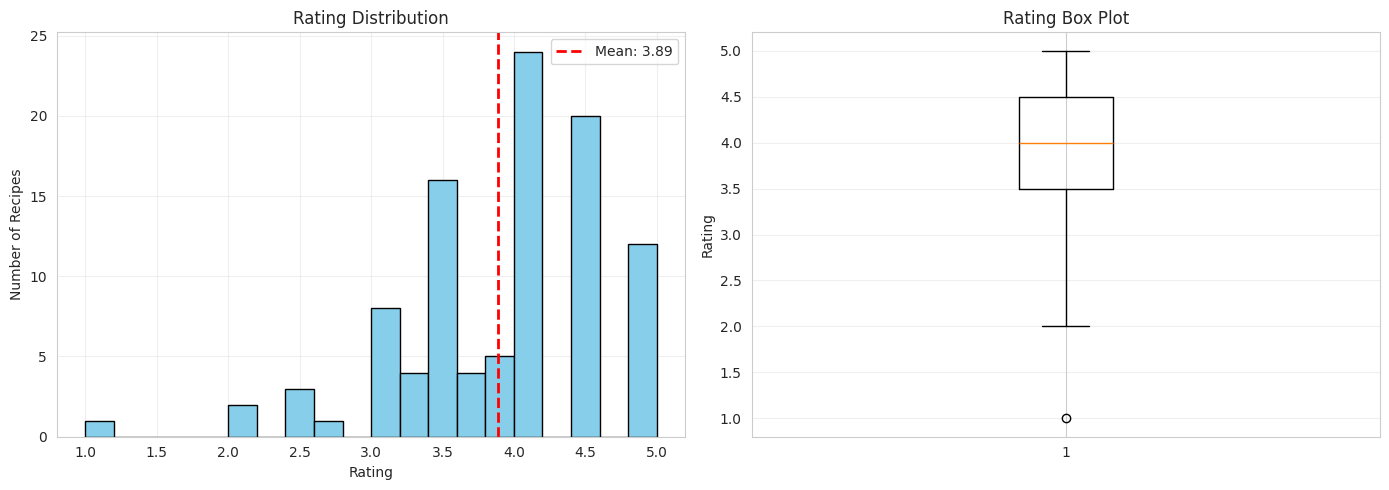

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['avg_rating'], bins=20, color='skyblue', edgecolor='black')
axes[0].axvline(df['avg_rating'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["avg_rating"].mean():.2f}')
axes[0].set_xlabel('Rating')
axes[0].set_ylabel('Number of Recipes')
axes[0].set_title('Rating Distribution')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].boxplot(df['avg_rating'])
axes[1].set_ylabel('Rating')
axes[1].set_title('Rating Box Plot')
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


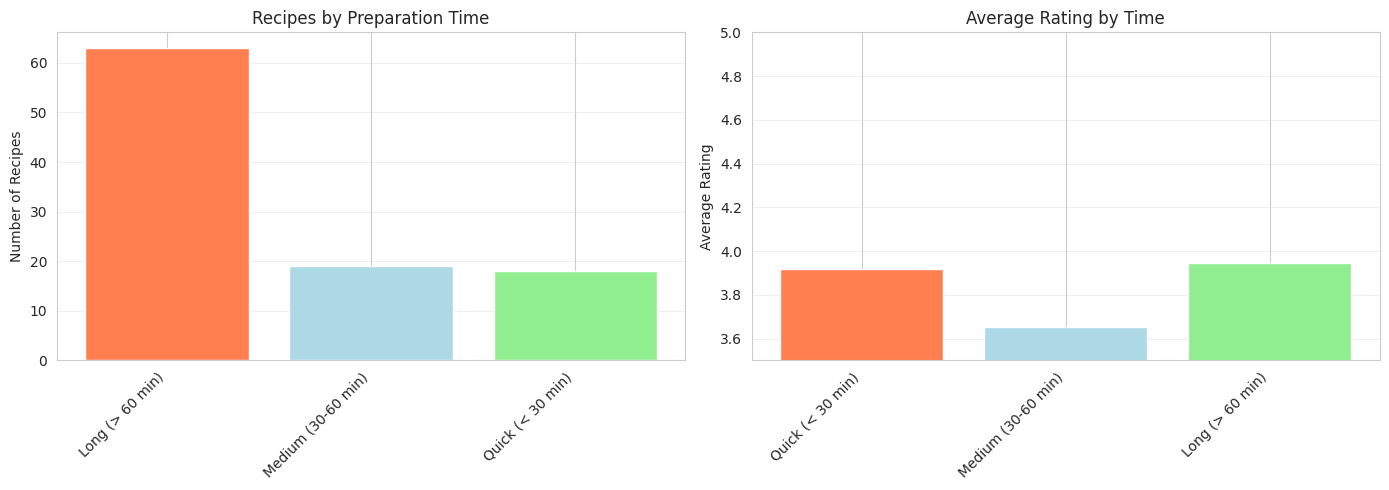

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

time_counts = df['time_category'].value_counts()
axes[0].bar(range(len(time_counts)), time_counts.values, color=['coral', 'lightblue', 'lightgreen'])
axes[0].set_xticks(range(len(time_counts)))
axes[0].set_xticklabels(time_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Recipes')
axes[0].set_title('Recipes by Preparation Time')
axes[0].grid(alpha=0.3, axis='y')

time_rating = df.groupby('time_category')['avg_rating'].mean()
axes[1].bar(range(len(time_rating)), time_rating.values, color=['coral', 'lightblue', 'lightgreen'])
axes[1].set_xticks(range(len(time_rating)))
axes[1].set_xticklabels(time_rating.index, rotation=45, ha='right')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating by Time')
axes[1].set_ylim([3.5, 5.0])
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


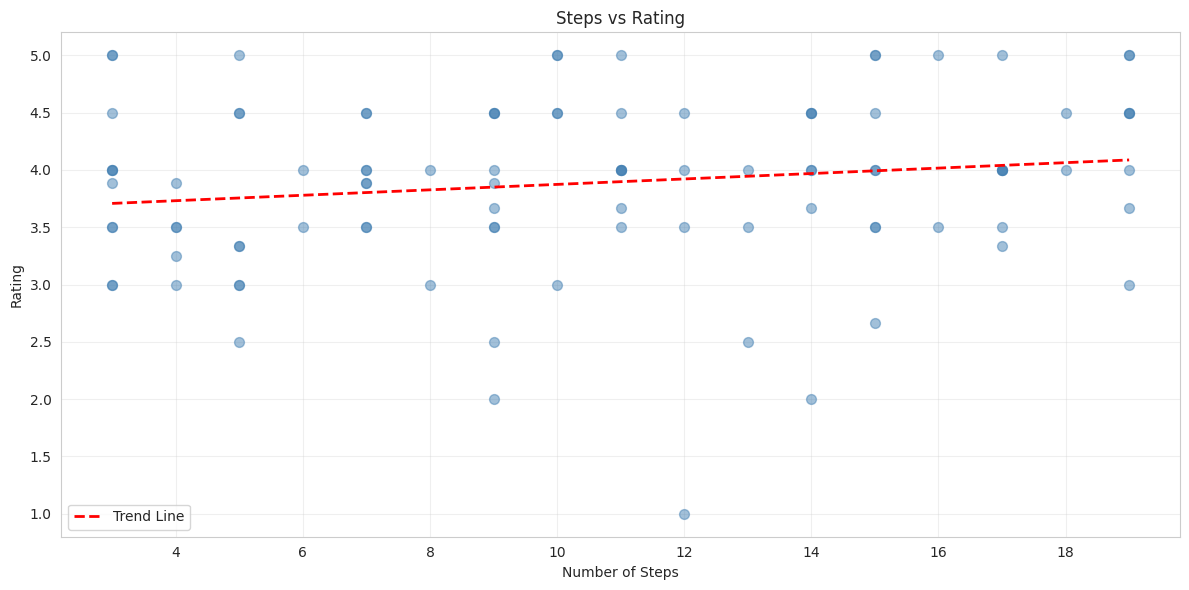

In [30]:
plt.figure(figsize=(12, 6))
plt.scatter(df['num_steps'], df['avg_rating'], alpha=0.5, s=50, color='steelblue')

z = np.polyfit(df['num_steps'], df['avg_rating'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['num_steps'].min(), df['num_steps'].max(), 100)
plt.plot(x_line, p(x_line), "r--", linewidth=2, label='Trend Line')

plt.xlabel('Number of Steps')
plt.ylabel('Rating')
plt.title('Steps vs Rating')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


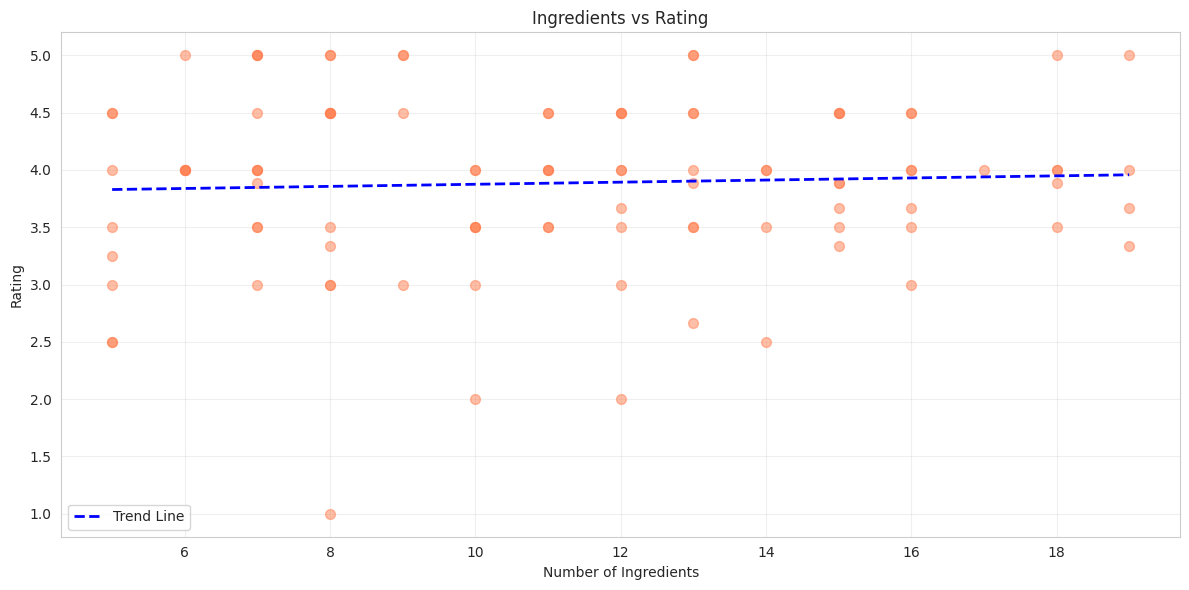

In [31]:
plt.figure(figsize=(12, 6))
plt.scatter(df['num_ingredients'], df['avg_rating'], alpha=0.5, s=50, color='coral')

z = np.polyfit(df['num_ingredients'], df['avg_rating'], 1)
p = np.poly1d(z)
x_line = np.linspace(df['num_ingredients'].min(), df['num_ingredients'].max(), 100)
plt.plot(x_line, p(x_line), "b--", linewidth=2, label='Trend Line')

plt.xlabel('Number of Ingredients')
plt.ylabel('Rating')
plt.title('Ingredients vs Rating')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


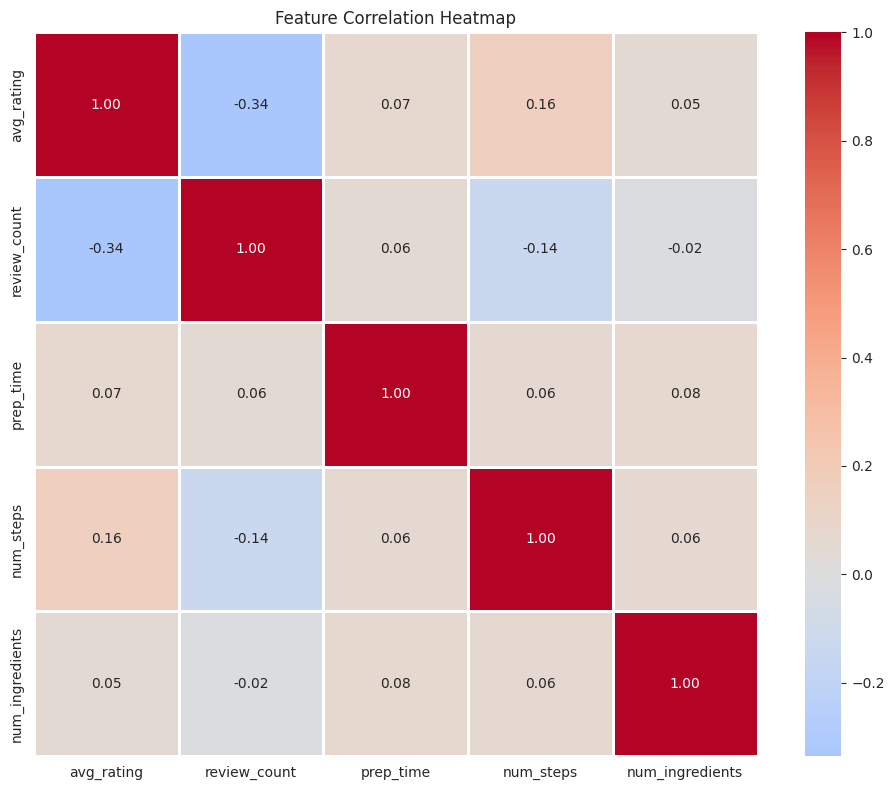

In [32]:
numeric_df = df[['avg_rating', 'review_count', 'prep_time', 'num_steps', 'num_ingredients']].copy()
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True, linewidths=1)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


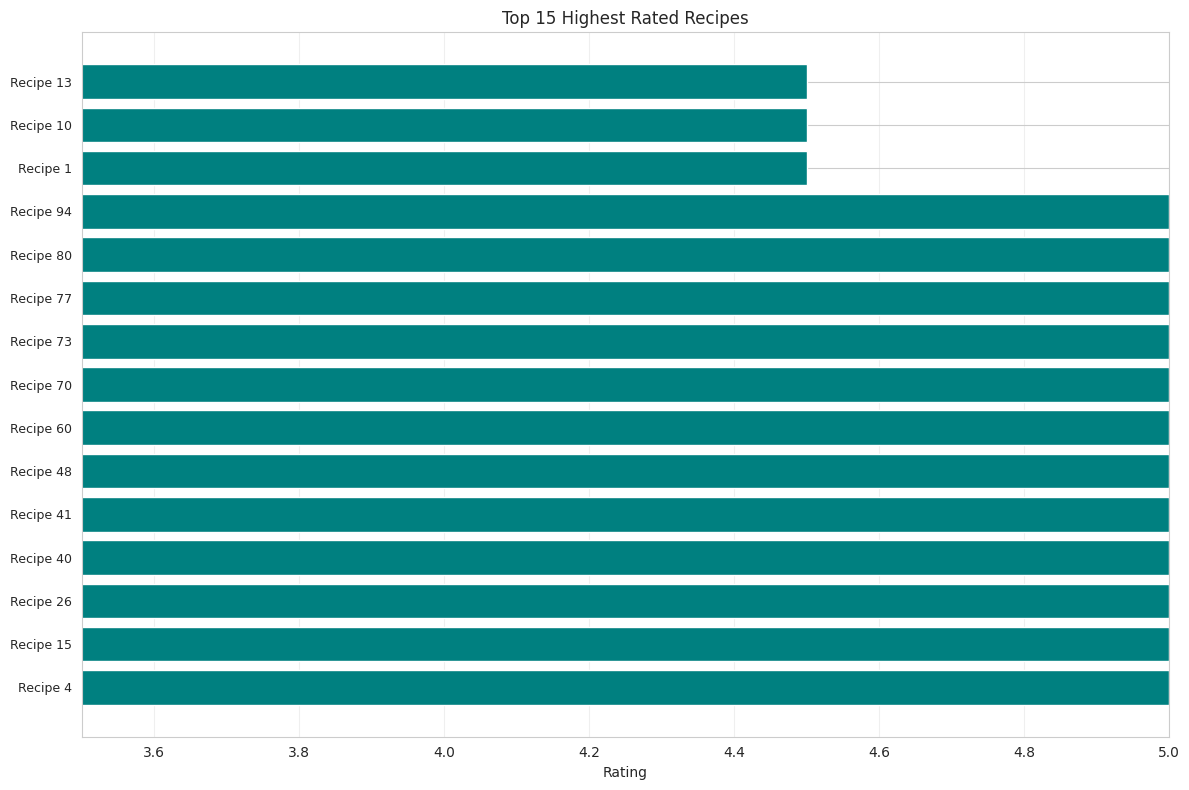

In [33]:
top_15 = df.nlargest(15, 'avg_rating')

plt.figure(figsize=(12, 8))
y_pos = np.arange(len(top_15))
plt.barh(y_pos, top_15['avg_rating'].values, color='teal')
plt.yticks(y_pos, [name[:30] for name in top_15['recipe_name'].values], fontsize=9)
plt.xlabel('Rating')
plt.title('Top 15 Highest Rated Recipes')
plt.xlim([3.5, 5.0])
plt.grid(alpha=0.3, axis='x')
plt.tight_layout()
plt.show()


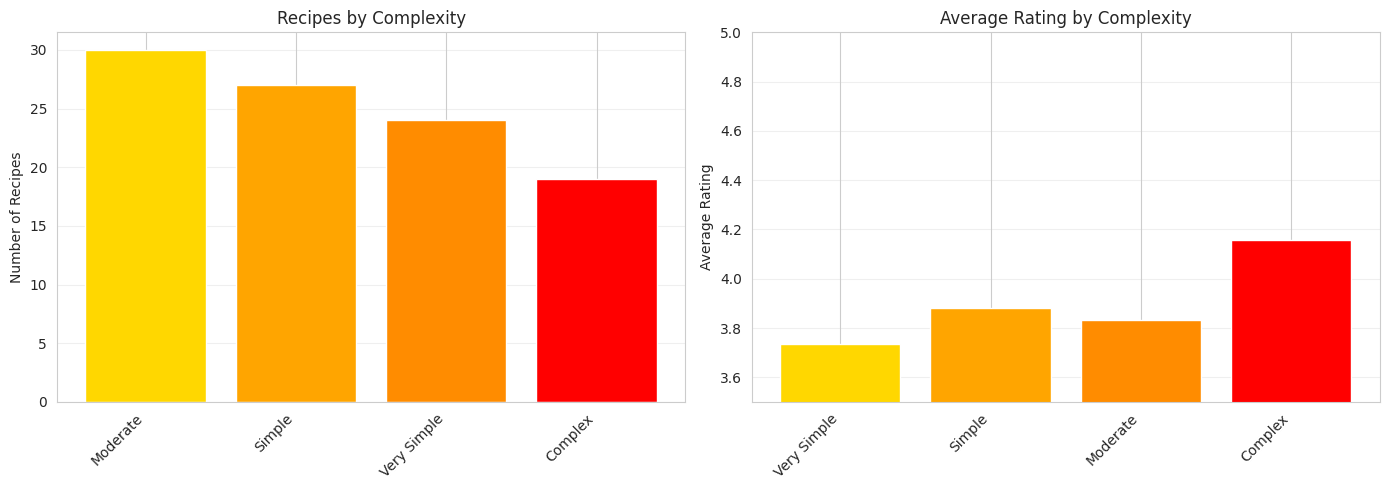

In [35]:
df['complexity'] = pd.cut(
    df['num_steps'],
    bins=[0, 5, 10, 15, 50],
    labels=['Very Simple', 'Simple', 'Moderate', 'Complex']
)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

complexity_counts = df['complexity'].value_counts()
axes[0].bar(range(len(complexity_counts)), complexity_counts.values, color=['gold', 'orange', 'darkorange', 'red'])
axes[0].set_xticks(range(len(complexity_counts)))
axes[0].set_xticklabels(complexity_counts.index, rotation=45, ha='right')
axes[0].set_ylabel('Number of Recipes')
axes[0].set_title('Recipes by Complexity')
axes[0].grid(alpha=0.3, axis='y')

complexity_rating = df.groupby('complexity')['avg_rating'].mean()
axes[1].bar(range(len(complexity_rating)), complexity_rating.values, color=['gold', 'orange', 'darkorange', 'red'])
axes[1].set_xticks(range(len(complexity_rating)))
axes[1].set_xticklabels(complexity_rating.index, rotation=45, ha='right')
axes[1].set_ylabel('Average Rating')
axes[1].set_title('Average Rating by Complexity')
axes[1].set_ylim([3.5, 5.0])
axes[1].grid(alpha=0.3, axis='y')

plt.tight_layout()
plt.show()


In [36]:
print("\n" + "=" * 70)
print("COMPLETE RECIPE ANALYSIS SUMMARY")
print("=" * 70)

print(f"\n📊 DATASET OVERVIEW:")
print(f"  Total Recipes: {len(df)}")
print(f"  Total Reviews: {df['review_count'].sum():.0f}")

print(f"\n⭐ RATING INSIGHTS:")
print(f"  Average Rating: {df['avg_rating'].mean():.2f} / 5.0")
print(f"  Highest Rating: {df['avg_rating'].max():.2f}")
print(f"  Lowest Rating: {df['avg_rating'].min():.2f}")

print(f"\n⏱️  TIME INSIGHTS:")
print(f"  Average Prep Time: {df['prep_time'].mean():.1f} minutes")
print(f"  Most Common: Quick recipes (< 30 min)")

print(f"\n🔧 COMPLEXITY INSIGHTS:")
print(f"  Average Steps: {df['num_steps'].mean():.1f}")
print(f"  Average Ingredients: {df['num_ingredients'].mean():.1f}")

print(f"\n📈 CORRELATION FINDINGS:")
corr_with_rating = numeric_df.corr()['avg_rating'].sort_values(ascending=False)
print(corr_with_rating)

print(f"\n🏆 TOP 3 RECIPES:")
for idx, (i, row) in enumerate(df.nlargest(3, 'avg_rating').iterrows(), 1):
    print(f"  {idx}. {row['recipe_name']}: {row['avg_rating']:.2f} ⭐ ({row['review_count']:.0f} reviews)")

print("\n" + "=" * 70)
print("Analysis Complete!")
print("=" * 70)



COMPLETE RECIPE ANALYSIS SUMMARY

📊 DATASET OVERVIEW:
  Total Recipes: 100
  Total Reviews: 198

⭐ RATING INSIGHTS:
  Average Rating: 3.89 / 5.0
  Highest Rating: 5.00
  Lowest Rating: 1.00

⏱️  TIME INSIGHTS:
  Average Prep Time: 67.5 minutes
  Most Common: Quick recipes (< 30 min)

🔧 COMPLEXITY INSIGHTS:
  Average Steps: 10.5
  Average Ingredients: 11.1

📈 CORRELATION FINDINGS:
avg_rating         1.000000
num_steps          0.161132
prep_time          0.073833
num_ingredients    0.049648
review_count      -0.335282
Name: avg_rating, dtype: float64

🏆 TOP 3 RECIPES:
  1. Recipe 4: 5.00 ⭐ (1 reviews)
  2. Recipe 15: 5.00 ⭐ (1 reviews)
  3. Recipe 26: 5.00 ⭐ (1 reviews)

Analysis Complete!
